 ! pip install librosa sounddevice

 ! pip install pydub
 
 ! pip install matplotlib

In [ ]:
from pydub import AudioSegment
import os


# Path to your input and output files
input_path = r'AudioFiles\ghost_voices_4.m4a'   # Replace with your .m4a file path
output_dir = 'ConvertedAudioFiles'

os.makedirs(output_dir, exist_ok=True)
splited_file_name = input_path.split(sep="\\")
output_file_name = splited_file_name[1].split(".")
output_path = os.path.join(output_dir, fr'{output_file_name[0]}.wav')  # Specify output file name

# Load and convert
audio = AudioSegment.from_file(input_path, format="m4a")
audio.export(output_path, format="wav")

print(f"{input_path} file was converted to: {output_path}")

 #### Load and play an audio file using librosa and sounddevice

In [16]:
import librosa
import sounddevice as sd

# Path to your audio file
audio_path = r'ConvertedAudioFiles\my_voice.wav'  # Replace with your file path

# Load audio file
y, sr = librosa.load(audio_path, sr=None)

# Play audio
sd.play(y, sr)
sd.wait()  # Wait until playback is

#### Plot a waveform

 What the plot represents
- X‑axis (Time in seconds) → The full recording spans 0 to ~20 seconds. This lets you see when sound events happen.
- Y‑axis (Amplitude) → This is the signal strength, normalized to between roughly -0.6 and +0.6 here.
- Positive values: air pressure waves pushing outward (relative to the microphone).
- Negative values: waves pulling inward.
- The squiggly line → Changes in amplitude over time — basically, the raw audio wave.

🔍 What you can read from it
- Peaks and troughs = Louder moments. Taller spikes mean higher amplitude (more volume).
- Flat or low‑amplitude sections = Quieter parts or silence.
- Variations in density of wiggles
- Closely packed oscillations → higher‑pitched sounds.
- More spread‑out oscillations → lower‑pitched sounds.

🧠 Insights that could be extracted
- Dynamic range → This signal’s variation isn’t huge (±0.6), so the recording might not be fully normalized for max loudness.
- Structure → You could zoom in on certain sections to analyze specific events — speech, beats, or instrument notes.
- Next step → Converting this to a spectrogram would show how frequencies evolve over the 20 seconds, which is more revealing than amplitude alone.


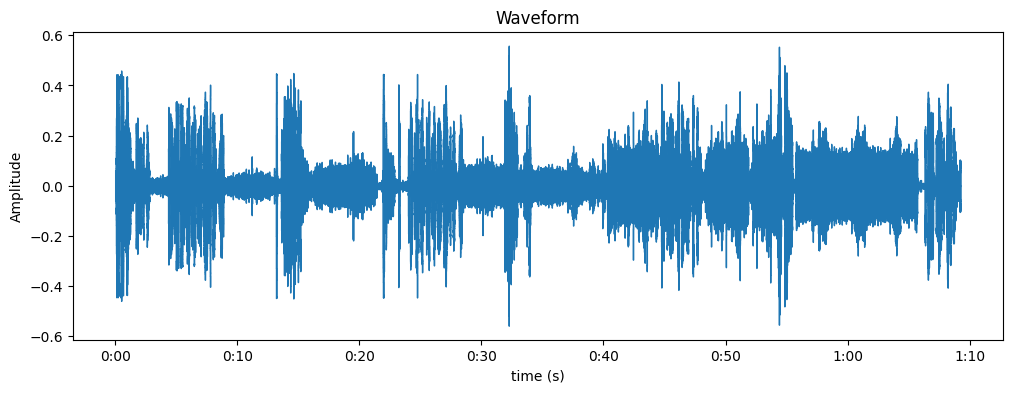

In [10]:
import matplotlib.pyplot as plt
import librosa.display
%matplotlib inline

# Path to your audio file
audio_path = r'ConvertedAudioFiles\ghost_voices_4.wav'  # Replace with your file path

# Load audio file
y, sr = librosa.load(audio_path, sr=None)

plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.xlabel("time (s)")
plt.ylabel("Amplitude")
plt.show()

#### Spectrogram (time + frequency)

The anatomy of a spectrogram
- Horizontal axis (X‑axis) → Time, just like in your waveform, so you can track when events happen.
- Vertical axis (Y‑axis) → Frequency, usually in Hertz (Hz).
- Low frequencies are at the bottom (bass notes, rumbles).
- High frequencies are at the top (whistles, cymbals, sibilants).
- Color intensity → Loudness at that frequency & time.
- Bright or warm colors (yellow, red) = stronger/louder energy.
- Dark or cool colors (blues, purples) = quieter energy.

🔍 What you can learn from it
- Pitch content → Steady horizontal bands indicate sustained tones (like singing a note or a held instrument).
- Rhythm & timing → Repeating patterns in the colors/frequency bands can reveal beats, strums, or recurring phrases.
- Timbre → The “texture” of a sound shows up in how the harmonics (stacked bands above a fundamental) look.
- Transitions → Gliding bands show pitch slides or portamentos.
- Noise vs. tone → Noise appears as wide, fuzzy color smears across many frequencies at once (like claps or static).

🧠 Going deeper
From a single spectrogram, you could:
- Identify the instrumentation or type of voice used.
- See where energy is concentrated — e.g., a bass‑heavy mix vs. a treble‑bright one.
- Spot events invisible in a waveform, like faint background hiss or harmonics.




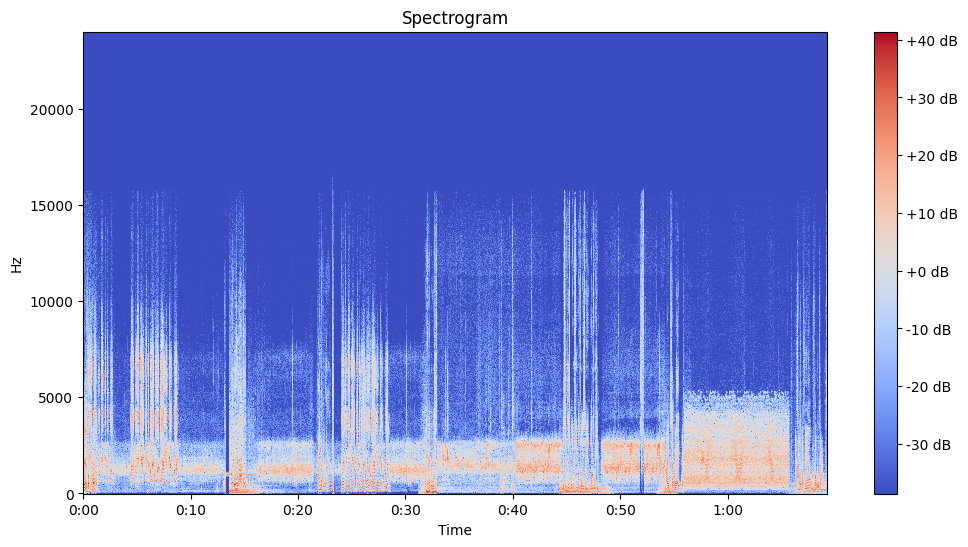

In [11]:
S = librosa.stft(y)
S_db = librosa.amplitude_to_db(abs(S))

plt.figure(figsize=(12, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format="%+2.f dB")
plt.title("Spectrogram")
plt.show()
